 <p style="font-size:36px;text-align:center"> <b>Flowers Classification using CNN</b> </p>

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [4]:
url='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
zip_file=tf.keras.utils.get_file(origin=url,fname='flower_photos.tgz',extract=True)
base_dir=os.path.join(os.path.dirname(zip_file),'flower_photos')

## Storing different flowers in different folders 

In [5]:
classes=['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
for cl in classes:
  img_path = os.path.join(base_dir, cl)
  images = glob.glob(img_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(images)))
  train, val = images[:round(len(images)*0.8)], images[round(len(images)*0.8):]

  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
      os.makedirs(os.path.join(base_dir, 'train', cl))
    shutil.move(t, os.path.join(base_dir, 'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
      os.makedirs(os.path.join(base_dir, 'val', cl))
    shutil.move(v, os.path.join(base_dir, 'val', cl))

daisy: 633 Images
dandelion: 898 Images
roses: 641 Images
sunflowers: 699 Images
tulips: 799 Images


In [6]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [7]:
batch=100
image_size=150

# Augmentation of data

In [8]:
image_aug=ImageDataGenerator(rescale=1./255,rotation_range=45,zoom_range=.5,width_shift_range=.15,
                            height_shift_range=.15,horizontal_flip=True)
train_gen=image_aug.flow_from_directory(batch_size=batch,
                                       directory=train_dir,
                                       shuffle=True,
                                       target_size=(image_size,image_size),class_mode='sparse')

Found 2935 images belonging to 5 classes.


In [9]:
def show(image):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes=axes.flatten()
    for img,ax in zip(image,axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

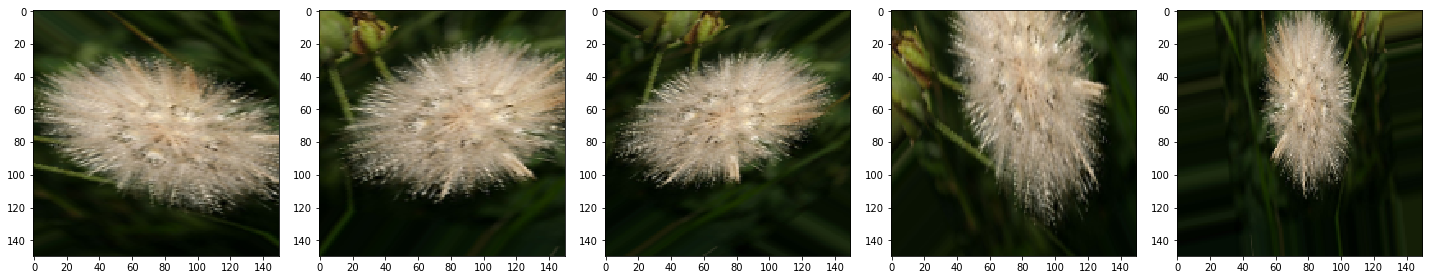

In [10]:
aug_images=[train_gen[0][0][0] for i in range(5)]
show(aug_images)

In [11]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_gen = image_gen_val.flow_from_directory(batch_size=batch, 
                                                 directory=val_dir, 
                                                 target_size=(150, 150),
                                                 class_mode='sparse')

Found 735 images belonging to 5 classes.


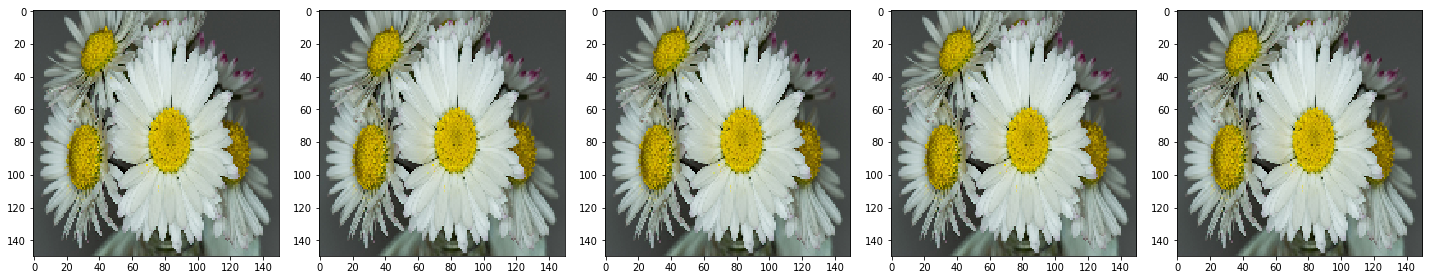

In [12]:
aug_images=[val_gen[0][0][0] for i in range(5)]
show(aug_images)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
model = Sequential()

model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(150,150, 3))) 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
epoch=10
history = model.fit_generator(
    train_gen,
    steps_per_epoch=int(np.ceil(train_gen.n / float(batch))),
    epochs=epoch,
    validation_data=val_gen,
    validation_steps=int(np.ceil(val_gen.n / float(batch)))
)

Epoch 1/10
30/30 [==============================] - 64s 2s/step - loss: 1.8772 - acc: 0.2654 - val_loss: 1.3520 - val_acc: 0.3986
Epoch 2/10
30/30 [==============================] - 68s 2s/step - loss: 1.2583 - acc: 0.4504 - val_loss: 1.1347 - val_acc: 0.5551
Epoch 3/10
30/30 [==============================] - 38s 1s/step - loss: 1.1483 - acc: 0.5223 - val_loss: 1.0289 - val_acc: 0.6204
Epoch 4/10
30/30 [==============================] - 38s 1s/step - loss: 1.0698 - acc: 0.5678 - val_loss: 0.9947 - val_acc: 0.6231
Epoch 5/10
30/30 [==============================] - 38s 1s/step - loss: 1.0392 - acc: 0.5959 - val_loss: 0.9531 - val_acc: 0.6544
Epoch 6/10
30/30 [==============================] - 38s 1s/step - loss: 0.9847 - acc: 0.6128 - val_loss: 0.9397 - val_acc: 0.6299
Epoch 7/10
30/30 [==============================] - 37s 1s/step - loss: 0.9508 - acc: 0.6262 - val_loss: 0.8593 - val_acc: 0.6735
Epoch 8/10
30/30 [==============================] - 37s 1s/step - loss: 0.9128 - acc: 0.64

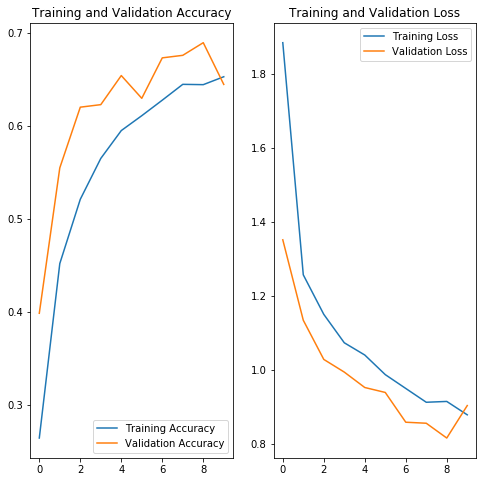

In [15]:
epoch=10
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epoch)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [35]:
#my laptop was taking too much time to I trained my model on colab with 100 epochs and downloaded the model. 

In [37]:
from tensorflow.keras.models import load_model
model=load_model('full_flower.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0         
__________

<p style="font-size:36px;text-align:center"> <b>Inference</b> </p>

In [27]:
from tensorflow.keras.preprocessing import image

JPEG
RGB
(1000, 1000)


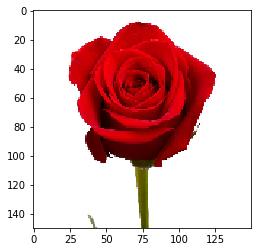

In [29]:
im=image.load_img("rose.jpg")
print(im.format)
print(im.mode)
print(im.size)
#im.show(im)
im=im.resize((150,150))
import numpy as np
im=np.array(im)/255.0
plt.imshow(im)

In [31]:
p=model.predict(im[np.newaxis, ...])
print("Prediction=",classes[np.argmax(p)])

Prediction= roses


JPEG
RGB
(1000, 563)


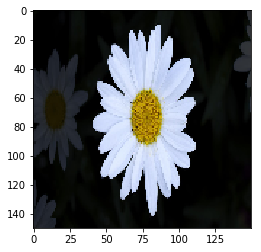

In [32]:
im=image.load_img("daisy.jpg")
print(im.format)
print(im.mode)
print(im.size)
im=im.resize((150,150))
im=np.array(im)/255.0
plt.imshow(im)

In [33]:
p=model.predict(im[np.newaxis, ...])
print("Prediction=",classes[np.argmax(p)])

Prediction= daisy
